KARIZvsMRD mean  0.18 KARIZvsMRD max 0.45 KARIZvsMRD min  0.0
KARIZvsCP mean 0.17 KARIZvsCP max 0.51 KARIZvsCP min  -0.02


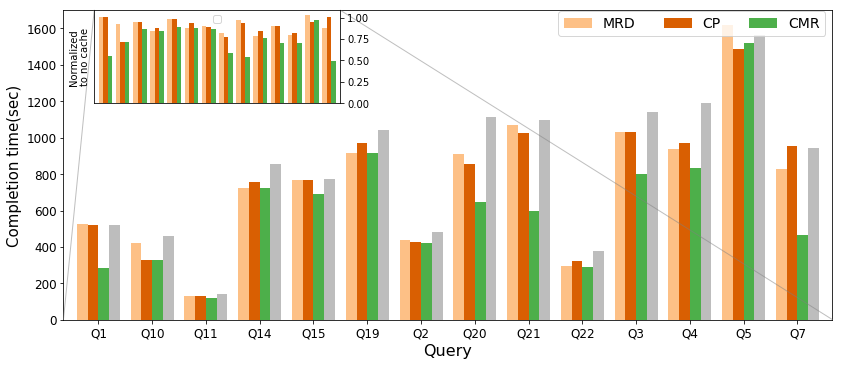

,MRD,CP,Kariz,NoCache,MRDp,CPp,Karizp
Query,,,,,,,
Q1,524.000000,520.666667,285.666667,518.333333,1.010932,1.004502,0.551125
Q10,423.000000,328.000000,327.000000,459.000000,0.921569,0.714597,0.712418
Q11,131.000000,131.000000,120.000000,139.000000,0.942446,0.942446,0.863309
Q14,723.000000,756.000000,723.000000,858.000000,0.842657,0.881119,0.842657
Q15,766.000000,766.000000,689.000000,775.000000,0.988387,0.988387,0.889032
Q19,917.000000,969.000000,917.000000,1041.000000,0.880884,0.930836,0.880884
Q2,436.666667,428.666667,419.333333,483.000000,0.904072,0.887509,0.868185
Q20,908.000000,856.000000,649.000000,1116.000000,0.813620,0.767025,0.581541
Q21,1071.000000,1025.000000,595.000000,1098.000000,0.975410,0.933515,0.541894


In [16]:
#!/usr/bin/python
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math

def format_yticks(y, pos=None):
    return str(int(y*100)) + '%'

colors=['#fdc086', '#d95f02', '#4daf4a', '#bdbdbd']
df1 = pd.read_csv('./implementationresults.csv')

df = df1.groupby("Query").agg({'Kariz': 'mean', 'MRD': 'mean', 
                               'CP': 'mean', 'infinite': 'mean', 'NoCache': 'mean'})

#print(df)


#df1.set_index('Query', inplace=True)

df['KARIZvsMRD'] = 1 - df['Kariz']/df['MRD']
df['KARIZvsCP'] = 1 - df['Kariz']/df['CP']
df['Karizp'] = df['Kariz']/df['NoCache']
df['CPp'] = df['CP']/df['NoCache']
df['MRDp'] = df['MRD']/df['NoCache']


print('KARIZvsMRD mean ', round(df['KARIZvsMRD'].mean(), 2), 'KARIZvsMRD max', round(df['KARIZvsMRD'].max(), 2), 'KARIZvsMRD min ', round(df['KARIZvsMRD'].min(), 2))
print('KARIZvsCP mean', round(df['KARIZvsCP'].mean(), 2), 'KARIZvsCP max', round(df['KARIZvsCP'].max(), 2), 'KARIZvsCP min ', round(df['KARIZvsCP'].min(), 2))


fig, ax = plt.subplots(figsize=(12, 5))
plt.ylabel('Completion time(sec)', fontsize=15)
plt.xlabel('TPCH Query', fontsize=16)
df[['MRD', 'CP', 'Kariz', 'NoCache']].plot.bar(rot=0, ax=ax, width=0.8
                                                , color=colors)

def hieght(c_h):
    if c_h < 0.1:
        return c_h + 0.08
    elif c_h < 0.2:
        return c_h + 0.1
    elif c_h > 0.3:
        return c_h - 0.05
    return c_h


ax.tick_params(axis='both', which='major', labelsize=12)#
#ax.set_xticklabels(['Q1', 'Q4', 'Q2', 'Q3', 'Q10',
#                            'Q11', 'Q14', 'Q15', 'Q7', 'Q19', 'Q20', 'Q21', 'Q22'])

ax.tick_params(axis='both', which='major', labelsize=12)
#ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_yticks))
ax.legend(['MRD', 'CP', 'CMR'], ncol=3, bbox_to_anchor=(0.65, 0.67, 0.35, 0.35), fontsize=14)
#plt.ylim(0, 0.7)
plt.grid(False)




# inset axes....
axins = ax.inset_axes([0.04, 0.7,0.32,0.3])



df[['MRDp', 'CPp', 'Karizp']].plot.bar(rot=0, ax=axins, width=0.8
                                                , color=colors)

axins.set_xlabel('')
axins.set_ylabel('Normalized\nto no cache')

# sub region of the original image
#x1, x2, y1, y2 = -0.03, 12, 0, 1
#axins.set_xlim(x1, x2)
#axins.set_ylim(y1, y2)
axins.xaxis.set_ticks([])
axins.legend('')
axins.yaxis.tick_right()
axins.yaxis.set_ticks([0, 0.25, 0.5, 0.75, 1])
#axins.tick_params(axis='both', which='major', labelsize=12)

ax.indicate_inset_zoom(axins)

#ax.set_xlim(left=0, right=168)
#ax.set_ylim(bottom=-0.1)
#ax.tick_params(axis='both', which='major', labelsize=14)





plt.subplots_adjust(left=0.1, bottom=0.13, right=0.99, top=0.99)
fig.savefig('/local0/papers/KARIZ/OSDI20/Figures/fig_runtimeimplementation.pdf', format='pdf', dpi=200)
fig.savefig('/local0/papers/KARIZ/OSDI20/Figures/scripts/fig_runtimeimplementation.png', format='png', dpi=200)
plt.show()

df[['MRD', 'CP', 'Kariz', 'NoCache', 'MRDp', 'CPp', 'Karizp']]

In [6]:
import matplotlib.pyplot as plt
import numpy as np


sns.set_style("white")

fig, ax = plt.subplots(figsize=[8, 3])

sns.regplot(ax=ax, x='n_dags', y = 'runtime' , data=df, marker="o", label = 'Mirab latency',
            scatter_kws={'s': 45, 'color':'#999999', 'label':'Word count'},
            line_kws={'color': '#2166ac', 'lw':2, 'ls': '--', 'label':'Linear regression'})

sns.regplot(ax=ax, x='n_dags', y = 'runtime' , data=df, marker="o", order=2,
            scatter_kws={'s': 45, 'color':'#999999', 'label':'Word count'},
            line_kws={'color': '#b2182b', 'lw': 3, 'label':'2nd-order regression'})

ax.set_xlabel("Number of running DAGs", fontsize=16)
ax.set_ylabel("CMR runtime (sec)", fontsize=16)
ax.yaxis.set_ticks([0, 1, 2, 3, 4, 5, 6])
ax.legend()


# inset axes....
axins = ax.inset_axes([0.06, 0.58,0.5,0.4])

sns.regplot(ax=axins, x='n_dags', y = 'runtime' , data=df, marker="o", order=2,
            scatter_kws={'s': 45, 'color':'#999999', 'label':'Word count'},
            line_kws={'color': '#b2182b', 'lw': 2, 'label':'2nd-order regression'})

axins.set_xlabel('')
axins.set_ylabel('')

# sub region of the original image
x1, x2, y1, y2 = 1, 33, -.1, 1.6
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.xaxis.set_ticks([0, 5, 10, 15, 20, 25, 30])
axins.yaxis.set_ticks([0, 0.5, 1, 1.5])
axins.tick_params(axis='both', which='major', labelsize=12)

ax.indicate_inset_zoom(axins)

ax.set_xlim(left=0, right=168)
ax.set_ylim(bottom=-0.1)
ax.tick_params(axis='both', which='major', labelsize=14)


plt.subplots_adjust(left=0.08, bottom=0.18, right=0.98, top=0.97)
plt.savefig('/local0/papers/KARIZ/OSDI20/Figures/fig_mirab_overhead_vs_ndag_sb.pdf', format='pdf', dpi=200)
plt.savefig('/local0/papers/KARIZ/OSDI20/Figures/fig_mirab_overhead_vs_ndag_sb.png', format='png', dpi=200)

plt.show()

NameError: name 'sns' is not defined

KARIZvsMRD mean  0.42 KARIZvsMRD max 0.66 KARIZvsMRD min  -0.04
KARIZvsCP mean 0.37 KARIZvsCP max 0.67 KARIZvsCP min  0.05


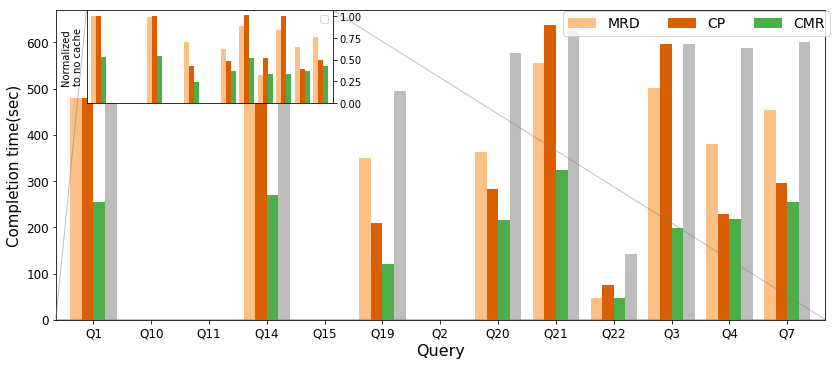

,MRD,CP,Kariz,NoCache,MRDp,CPp,Karizp
Query,,,,,,,
Q1,479.213664,480.024765,254.839917,476.995460,1.004650,1.006351,0.534261
Q10,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
Q11,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
Q14,490.313594,496.148192,269.623346,495.148624,0.990235,1.002019,0.544530
Q15,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
Q19,349.978617,209.755617,119.972256,494.314970,0.708007,0.424336,0.242704
Q2,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
Q20,362.018744,282.224786,215.831331,575.979056,0.628528,0.489991,0.374721
Q21,554.791838,637.490381,324.188301,624.808205,0.887939,1.020298,0.518861


In [17]:
#!/usr/bin/python
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math

def format_yticks(y, pos=None):
    return str(int(y*100)) + '%'

colors=['#fdc086', '#d95f02', '#4daf4a', '#bdbdbd']
df1 = pd.read_csv('implementationresultssparks.csv')

df = df1.groupby("Query").agg({'Kariz': 'mean', 'MRD': 'mean', 
                               'CP': 'mean', 'infinite': 'mean', 'NoCache': 'mean'})

#print(df)


#df1.set_index('Query', inplace=True)

df['KARIZvsMRD'] = 1 - df['Kariz']/df['MRD']
df['KARIZvsCP'] = 1 - df['Kariz']/df['CP']
df['Karizp'] = df['Kariz']/df['NoCache']
df['CPp'] = df['CP']/df['NoCache']
df['MRDp'] = df['MRD']/df['NoCache']


print('KARIZvsMRD mean ', round(df['KARIZvsMRD'].mean(), 2), 'KARIZvsMRD max', round(df['KARIZvsMRD'].max(), 2), 'KARIZvsMRD min ', round(df['KARIZvsMRD'].min(), 2))
print('KARIZvsCP mean', round(df['KARIZvsCP'].mean(), 2), 'KARIZvsCP max', round(df['KARIZvsCP'].max(), 2), 'KARIZvsCP min ', round(df['KARIZvsCP'].min(), 2))


fig, ax = plt.subplots(figsize=(12, 5))
plt.ylabel('Completion time(sec)', fontsize=15)
plt.xlabel('TPCH Query', fontsize=16)
df[['MRD', 'CP', 'Kariz', 'NoCache']].plot.bar(rot=0, ax=ax, width=0.8
                                                , color=colors)

def hieght(c_h):
    if c_h < 0.1:
        return c_h + 0.08
    elif c_h < 0.2:
        return c_h + 0.1
    elif c_h > 0.3:
        return c_h - 0.05
    return c_h


ax.tick_params(axis='both', which='major', labelsize=12)
#ax.set_xticklabels(['Q1', 'Q4', 'Q2', 'Q3', 'Q10',
#                            'Q11', 'Q14', 'Q15', 'Q7', 'Q19', 'Q20', 'Q21', 'Q22'])

ax.tick_params(axis='both', which='major', labelsize=12)
#ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_yticks))
ax.legend(['MRD', 'CP', 'CMR'], ncol=3, bbox_to_anchor=(0.65, 0.67, 0.35, 0.35), fontsize=14)
#plt.ylim(0, 0.7)
plt.grid(False)




# inset axes....
axins = ax.inset_axes([0.04, 0.7,0.32,0.3])



df[['MRDp', 'CPp', 'Karizp']].plot.bar(rot=0, ax=axins, width=0.8
                                                , color=colors)

axins.set_xlabel('')
axins.set_ylabel('Normalized\nto no cache')

# sub region of the original image
#x1, x2, y1, y2 = -0.03, 12, 0, 1
#axins.set_xlim(x1, x2)
#axins.set_ylim(y1, y2)
axins.xaxis.set_ticks([])
axins.legend('')
axins.yaxis.tick_right()
axins.yaxis.set_ticks([0, 0.25, 0.5, 0.75, 1])
#axins.tick_params(axis='both', which='major', labelsize=12)

ax.indicate_inset_zoom(axins)

#ax.set_xlim(left=0, right=168)
#ax.set_ylim(bottom=-0.1)
#ax.tick_params(axis='both', which='major', labelsize=14)





plt.subplots_adjust(left=0.1, bottom=0.13, right=0.99, top=0.99)
fig.savefig('/local0/papers/KARIZ/OSDI20/Figures/fig_runtimeimplementation_spark.pdf', format='pdf', dpi=200)
fig.savefig('/local0/papers/KARIZ/OSDI20/Figures/fig_runtimeimplementation_spark.png', format='png', dpi=200)
plt.show()

df[['MRD', 'CP', 'Kariz', 'NoCache', 'MRDp', 'CPp', 'Karizp']]